In [2]:
from maxim_pytorch.maxim_torch import MAXIM_dns_3s

In [3]:
import torch

In [4]:
torch.cuda.set_per_process_memory_fraction(0.5, 1)

In [5]:
gen = MAXIM_dns_3s(depth=2).to("cuda:1" if torch.cuda.is_available() else "cpu")

/root/anaconda3/envs/lzn/lib/python3.9/site-packages/torch/nn/init.py:403: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [6]:
x = torch.rand(1, 3, 768, 768).to("cuda:1" if torch.cuda.is_available() else "cpu")

In [7]:
getattr(gen, "stage_0_input_conv_1").parameters()

<generator object Module.parameters at 0x7efe390db510>

In [8]:
for name, param in gen.named_parameters():
    if name.startswith('stage_0'):
        # param.requires_grad = False
        print(name)

stage_0_input_conv_0.weight
stage_0_input_conv_0.bias
stage_0_encoder_block_0.Conv_0.weight
stage_0_encoder_block_0.Conv_0.bias
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.LayerNorm_in.beta
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.LayerNorm_in.gamma
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.in_project.weight
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.in_project.bias
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.GridGmlpLayer.LayerNorm.beta
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.GridGmlpLayer.LayerNorm.gamma
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.GridGmlpLayer.in_project.weight
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.GridGmlpLayer.in_project.bias
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.GridGmlpLayer.GridGatingUnit.intermediate_layernorm.beta
stage_0_encoder_block_0.SplitHeadMultiAxisGmlpLayer_0.GridGmlpLayer.GridGatingUnit.intermediate_layernorm.gamma
stage_0_encoder_block_0.S

In [13]:
with torch.no_grad():
    d = gen(x)

In [21]:
d[-1][0].shape

torch.Size([1, 3, 192, 192])

In [9]:
gen(x).shape

RuntimeError: Given groups=1, weight of size [128, 128, 1, 1], expected input[1, 64, 192, 192] to have 128 channels, but got 64 channels instead

In [7]:
!nvidia-smi

Wed Aug 16 15:59:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.102.04   Driver Version: 450.102.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:09.0 Off |                    0 |
| N/A   43C    P0    53W / 300W |  30807MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:00:0A.0 Off |                    0 |
| N/A   

In [9]:
from PIL import Image

In [13]:
img1 = Image.open('data/1024*1024/69998.png')

In [12]:
img2 = Image.open('data/1024*1024/69999.png')

In [15]:
width = img1.width + img2.width  
height = img1.height

combined = Image.new('RGB', (width, height))
combined.paste(img1, (0, 0))
combined.paste(img2, (img1.width, 0))

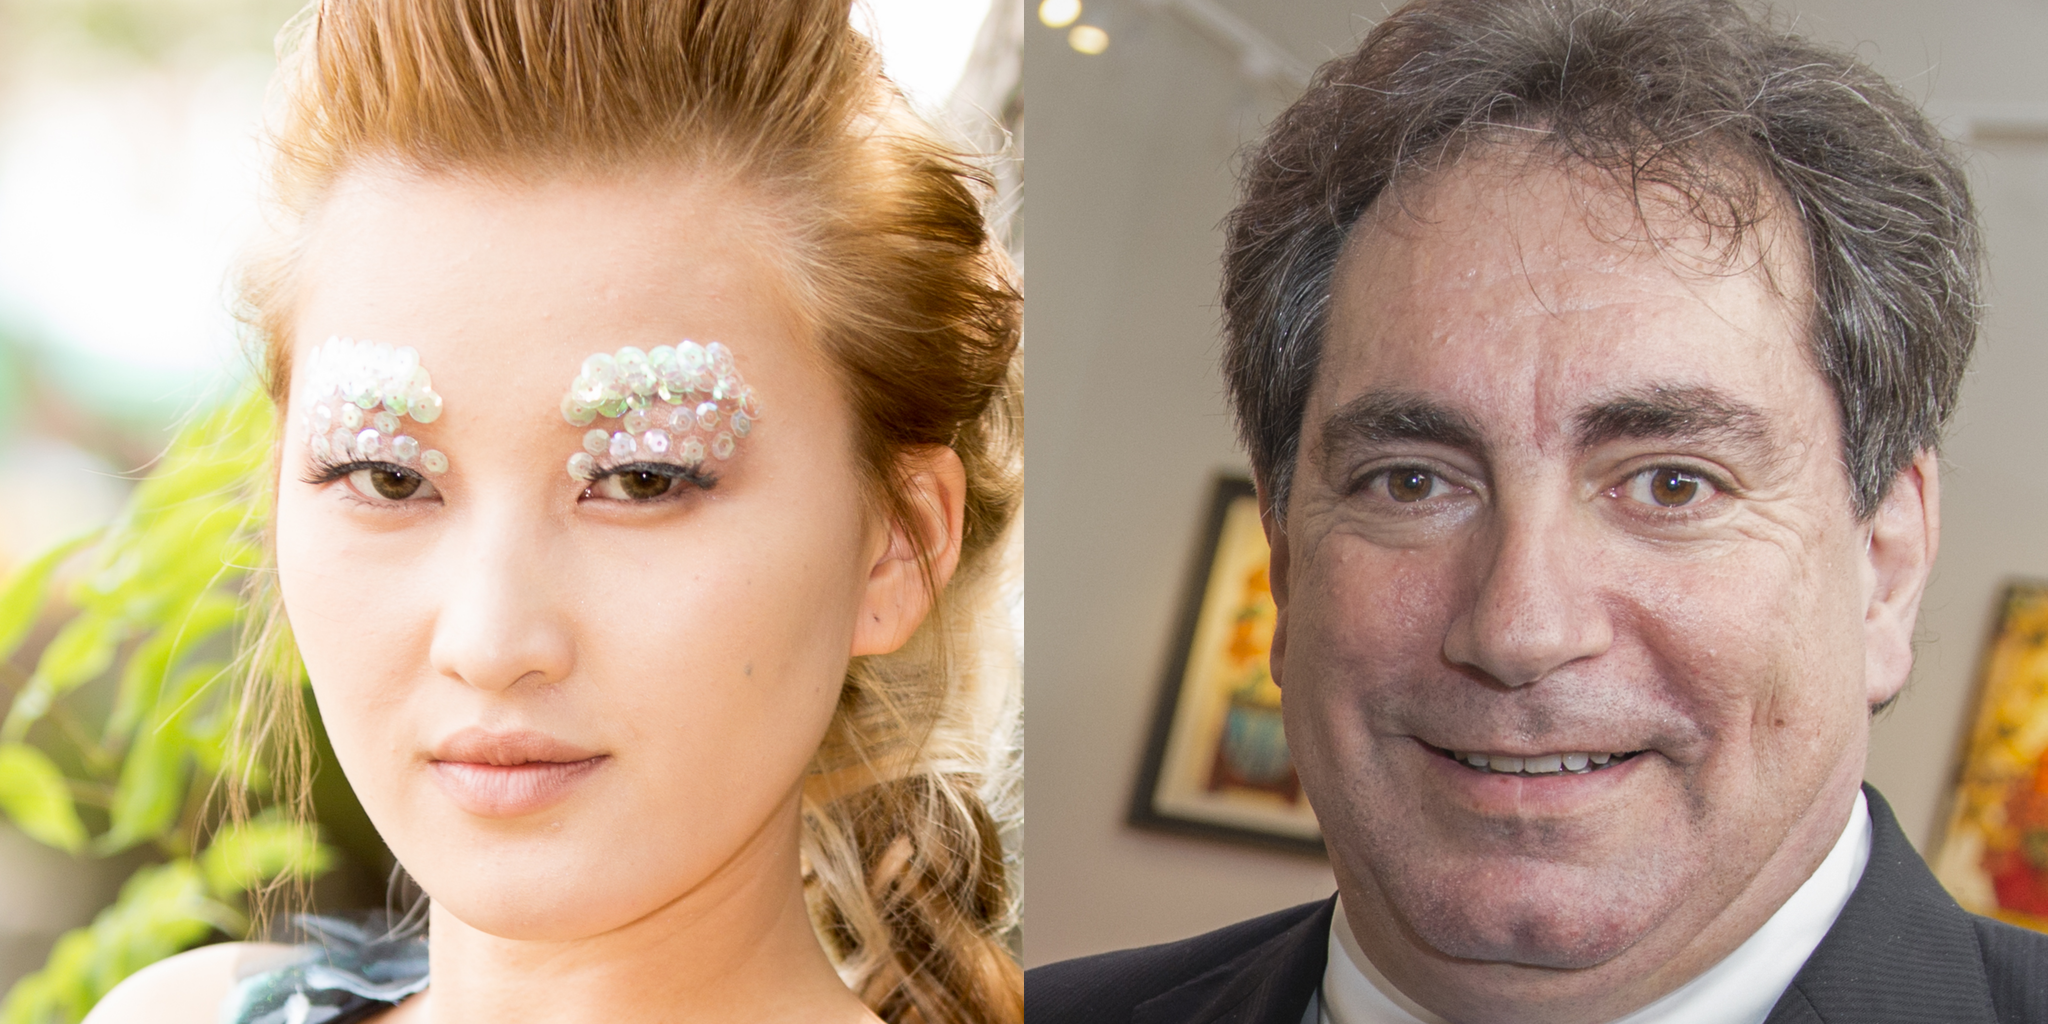

In [16]:
combined

In [17]:
combined.save('combined.jpg')